## Model Execution file

File contains the comparison of the two cases of CRN model. Also loads a parameter file which can be edited in the LMFIT parameter object. The purpose of using the LMFIT object here is to specify the bounds on the parameters and can be easily exported to a different file where LMFIT has been used for parameter estimation.  

In [81]:
## Import all the packages in this cell

from biocrnpyler import *
from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model

import pandas as pd
import numpy as np
import lmfit 

from matplotlib.ticker import ScalarFormatter
from matplotlib.lines import Line2D

from matplotlib import style
%config InlineBackend.figure_format = 'retina'

style.use("default")

%matplotlib inline

# To import experimental data 

from expt_data_import import *

In [82]:
## Load the model and defining the timepoints

model_degtag = Model(sbml_filename = 'Biocrnpyler_model_degtag_030225.xml')
model_no_tag = Model(sbml_filename = 'Biocrnpyler_model_no_degtag_030225.xml')

N_steps = 720
#N_steps = 720*40 # For simulation run for sensitivity analysis
t_final = 720
timepoints = np.linspace(0, t_final, N_steps)

tf_I = 720*40  # Time till we want to plot the simulation 
tf_i = 72   # Indice of the experimental data array till we want to plot the simulation

In [83]:
# Loading the experimental data 

[C, C_max, C_0, k_gr, C_max_avg, C_0_avg, k_gr_avg] = Get_OD_Data()
[A_non_leaky, time_A, B_non_leaky, time_B, avg_fold_change] = Get_FLOD_Data()

In [84]:
A1 = A_non_leaky[0][:tf_i]
A2 = A_non_leaky[1][:tf_i]
A3 = A_non_leaky[2][:tf_i]
A_avg = np.mean((A1,A2,A3), axis = 0)
A_max = np.max(A_avg)

In [85]:
## Wrote a function to pass the parameters of the model 

def run_CRN_model(param, model_degtag, model_no_tag, timepoints): 

    params = param.valuesdict() # params is an LMFIT object so values of parameters are extracted as a dictinory 

    n = 5.5 # Fixed parameter

    model_degtag.set_species({'dna_X': 100,
    'protein_sigma_machinery': params['Sigma_IC'],
    'protein_NT_units': params['NT_IC'],
    'protein_AA_units0tl': params['AA_IC'],
    'protein_RNAase_machinery': params['RNAase_IC'],
    'protein_unfolded_protein_degtag': 0,
    'rna_T_X':0,
    'protein_X':0,
    'cell_count_count': C_0_avg})

    model_no_tag.set_species({'dna_X': 100,
    'protein_sigma_machinery': params['Sigma_IC'],
    'protein_NT_units': params['NT_IC'],
    'protein_AA_units0tl': params['AA_IC'],
    'protein_RNAase_machinery': params['RNAase_IC'],
    'protein_unfolded_protein_degtag': 0,
    'rna_T_X':0,
    'protein_X':0,
    'cell_count_count': C_0_avg})

    model_degtag.set_params({'k__logistic_cell_growth': params['k_gr'], 
    'c_max__logistic_cell_growth': params['C_max'],
    'RNAP_max__bacterial_transcription': params['RNAP_max'],
    'n_gamma_RNAP__bacterial_transcription' : params['n_gamma_RNAP'],
    'Et_max__bacterial_translation': params['Et_max'],
    'n_gamma_Et__bacterial_translation' : params['n_gamma_Et'],
    'Ribo_max__bacterial_translation': params['Ribo_max'],
    'n_gamma_Ribo__bacterial_translation' : params['n_gamma_Ribo'],
    'tRNA_max__bacterial_translation': params['tRNA_max'],
    'n_gamma_tRNA__bacterial_translation' : params['n_gamma_tRNA'],
    'Protease_max__bacterial_translation': params['Protease_max'],
    'n_gamma_Protease__bacterial_translation' : params['n_gamma_Protease'],
    'n_gamma_folding__bacterial_translation' : params['n_gamma_folding'],
    'n_gamma_syn__bacterial_translation' : params['n_gamma_syn'],
   

    'k_tx_1b__bacterial_transcription':params['k_tx_1b'],
    'k_tx_1u__bacterial_transcription':params['k_tx_1u'],
    'k_tx_2u__bacterial_transcription':params['k_tx_2u'],
    'k_tx_2b__bacterial_transcription':params['k_tx_2b'],
    'k_tx_3__bacterial_transcription': params['k_tx_3'],
    'k_tx_4b__mrna_degradation':params['k_tx_4b'],
    'k_tx_4u__mrna_degradation':params['k_tx_4u'],
    'k_tx_5__mrna_degradation': params['k_tx_5'],

    'k_tl_1b__bacterial_translation':params['k_tl_1b'],
    'k_tl_1u__bacterial_translation':params['k_tl_1u'],
    'k_tl_2b__bacterial_translation':params['k_tl_2b'],
    'k_tl_3u__bacterial_translation':params['k_tl_3u'],
    'k_tl_3b__bacterial_translation':params['k_tl_3b'],
    'k_tl_4__bacterial_translation':params['k_tl_4'],
    'k_tl_5__bacterial_translation':params['k_tl_5'],
    'b_tl_5__bacterial_translation':params['b_tl_5'],
    'k_tl_6__bacterial_translation':params['k_tl_6'],
    'k_tl_7__non_tag_degradation':params['k_tl_7'],
    'k_tl_8__bacterial_translation':params['k_tl_8'],
    'k_tl_9b_P__bacterial_translation': params['k_tl_9b_P'],
    'k_tl_9b_Pm__bacterial_translation': params['k_tl_9b_Pm'],
    'k_tl_9u__bacterial_translation': params['k_tl_9u'],
    'k_tl_10__bacterial_translation': params['k_tl_10'],

    'n_delta__bacterial_transcription': n, 
    'n_delta__non_tag_degradation': n, 
    'n_delta__mrna_degradation': n})

    model_no_tag.set_params({'k__logistic_cell_growth': params['k_gr'], 
    'c_max__logistic_cell_growth': params['C_max'],
    'RNAP_max__bacterial_transcription': params['RNAP_max'],
    'n_gamma_RNAP__bacterial_transcription' : params['n_gamma_RNAP'],
    'Et_max__bacterial_translation': params['Et_max'],
    'n_gamma_Et__bacterial_translation' : params['n_gamma_Et'],
    'Ribo_max__bacterial_translation': params['Ribo_max'],
    'n_gamma_Ribo__bacterial_translation' : params['n_gamma_Ribo'],
    'tRNA_max__bacterial_translation': params['tRNA_max'],
    'n_gamma_tRNA__bacterial_translation' : params['n_gamma_tRNA'],
    'n_gamma_folding__bacterial_translation' : params['n_gamma_folding'],
    'n_gamma_syn__bacterial_translation' : params['n_gamma_syn'],
   

    'k_tx_1b__bacterial_transcription':params['k_tx_1b'],
    'k_tx_1u__bacterial_transcription':params['k_tx_1u'],
    'k_tx_2u__bacterial_transcription':params['k_tx_2u'],
    'k_tx_2b__bacterial_transcription':params['k_tx_2b'],
    'k_tx_3__bacterial_transcription': params['k_tx_3'],
    'k_tx_4b__mrna_degradation':params['k_tx_4b'],
    'k_tx_4u__mrna_degradation':params['k_tx_4u'],
    'k_tx_5__mrna_degradation': params['k_tx_5'],

    'k_tl_1b__bacterial_translation':params['k_tl_1b'],
    'k_tl_1u__bacterial_translation':params['k_tl_1u'],
    'k_tl_2b__bacterial_translation':params['k_tl_2b'],
    'k_tl_3u__bacterial_translation':params['k_tl_3u'],
    'k_tl_3b__bacterial_translation':params['k_tl_3b'],
    'k_tl_4__bacterial_translation':params['k_tl_4'],
    'k_tl_5__bacterial_translation':params['k_tl_5'],
    'b_tl_5__bacterial_translation':params['b_tl_5'],
    'k_tl_7__non_tag_degradation':params['k_tl_7'],
    'k_tl_8__bacterial_translation':params['k_tl_8'],
    'k_tl_10__bacterial_translation': params['k_tl_10'],

    'n_delta__bacterial_transcription': n, 
    'n_delta__non_tag_degradation': n, 
    'n_delta__mrna_degradation': n})

    sol_deg = py_simulate_model(timepoints = timepoints, Model = model_degtag)
    sol_no_deg = py_simulate_model(timepoints = timepoints, Model = model_no_tag)

    return sol_deg, sol_no_deg

In [86]:
## LMFIT object is used to define the parameters 

params = lmfit.Parameters()
# Loading a parameter file 
p = pd.read_csv('model_param_file_030525.csv').to_numpy()
p = p[:,2]


params.add(name = 'n_gamma_RNAP', value = p[0], min = 0.01, max = 0.9, vary = 1)
params.add(name = 'n_gamma_Et', value = p[1], min = 0.01, max = 0.9, vary = 1)
params.add(name = 'n_gamma_tRNA', value = p[2]*1 , min = 0.01, max = 0.9, vary = 1)
params.add(name = 'n_gamma_Ribo', value = p[3]*1, min = 0.01, max = 0.9, vary = 1)
params.add(name = 'n_gamma_Protease', value = p[4]*1, min = 0.01, max = 0.9, vary = 1)

params.add(name = "Sigma_IC", value = p[5], min = 1e1, max = 1e4, vary = 1)
params.add(name = "NT_IC", value = p[6]*1, min = 1e1, max = 1e4, vary = 1)
params.add(name = "RNAase_IC", value = p[7]*1, min = 1e1, max = 1e4, vary = 1)
params.add(name = "AA_IC", value = p[8]*1, min = 1e1, max = 1e6, vary = 1)

params.add(name = "Ribo_max", value = p[9]*1, min = 1e1, max = 1e4, vary = 1)
params.add(name = "tRNA_max", value = p[10]*1, min = 1e1, max = 1e4, vary = 1)
params.add(name = "RNAP_max", value = p[11]*1, min = 1e1, max = 1e4, vary = 1)
params.add(name = "Et_max", value = p[12]*1, min = 1e1, max = 1e4, vary = 1)
params.add(name = "Protease_max", value = p[13]*1, min = 1e1, max = 1e4, vary = 1)

k_tx_1b = 0.0371*1
k_tx_2u = 0.097*2

params.add(name = 'k_tx_1b', value = p[14]*1, min = 1*1e-3, max = 1*1e-1, vary = 1)
params.add(name = 'k_tx_1u', value = p[15], min = 3.71, max = 37.1, vary = 1)
params.add(name = 'k_tx_2b', value = p[16]*1 , min = 1.94e-4, max = 1.94e-3, vary = 1)
params.add(name = 'k_tx_2u', value = p[17]*1, min = 0.01, max = 0.1, vary = 1)
params.add(name = 'k_tx_3', value = p[18]*1, min = 0.001, max = 0.0036, vary = 1)
params.add(name = 'k_tx_4b', value = p[19], min = 0.1, max = 5, vary = 1)
params.add(name = 'k_tx_4u', value = p[20]*1, min = 100, max = 200, vary = 1)
params.add(name = 'k_tx_5', value = p[21]*1, min = 0.1, max = 10, vary = 1)

params.add(name = 'k_tl_1b', value = p[22], min = 1e-3, max = 1e1, vary = 1)
params.add(name = 'k_tl_1u', value = p[23], min = 1e1, max = 1e4, vary = 1)
params.add(name = 'k_tl_2u', value = p[24],  min = 1e1, max = 1e4, vary = 1)
params.add(name = 'k_tl_2b', value = p[25], min = 1e-3, max = 1e1, vary = 1)
params.add(name = 'k_tl_3b', value = p[26]*1,  min = 1e-3, max = 1e0, vary = 1)
params.add(name = 'k_tl_3u', value = p[27]*1, min = 1e1, max = 1e4, vary = 1)
params.add(name = 'k_tl_4', value = p[28]*1, min = 0.05, max = 1, vary = 1)
params.add(name = 'k_tl_5', value = p[29]*1, min = 0.1, max = 0.3, vary = 1)
params.add(name = "b_tl_5", value = p[30]*1, min = 0, max = 1, vary = 1)
params.add(name = 'k_tl_6', value = p[31]*1, min = 0.01, max = 10, vary = 1)
params.add(name = 'k_tl_7', value = p[32]*1, min = 0.0005, max = 0.01, vary = 1)
params.add(name = 'k_tl_8', value = p[33]*1, min = 1e1, max = 1e4, vary = 1)
params.add(name = 'k_tl_9b_P', value = p[34]*1, min = 1e-4, max = 1e1, vary = 1)
params.add(name = 'k_tl_9b_Pm', value = p[35]*1, min = 1e-4, max = 1e1, vary = 1)
params.add(name = 'k_tl_9u', value = p[36]*1, min = 1e1, max = 1e4, vary = 1)
params.add(name = 'k_tl_10', value = p[37]*1, min = 1e-4, max = 1e0, vary = 1)
params.add(name = 'n_gamma_folding', value = p[38]*1, min = 0.01, max = 0.9, vary = 1)
params.add(name = 'n_gamma_syn', value = p[39]*1, min = 0.01, max = 0.9, vary = 1)

params.add(name = 'C_max', value = p[40]*1, vary = 0)
params.add(name = "C_0", value = p[41], vary = 0)
params.add(name = "k_gr", value = p[42], vary = 0)


sol_deg, sol_no_deg = run_CRN_model(params, model_degtag, model_no_tag, timepoints)


## Plotting results

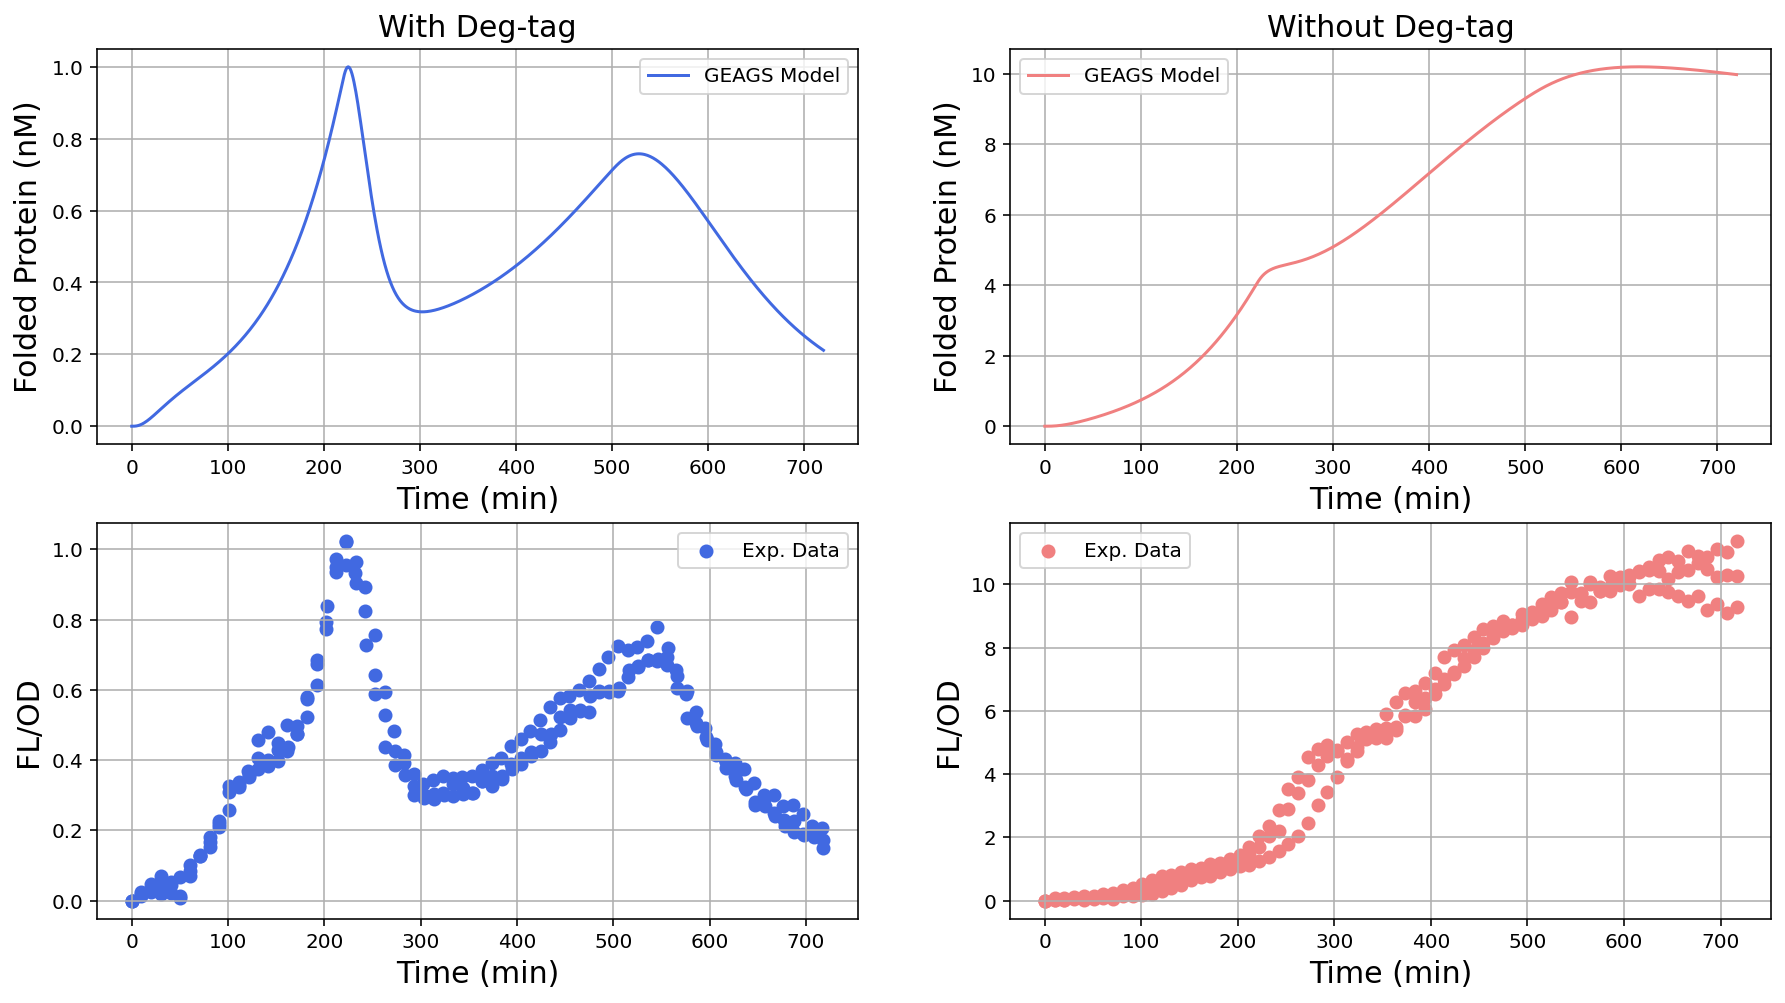

In [87]:
fig, ax = plt.subplots(2,2, figsize = (15,8))
fig.subplots_adjust(wspace = 0.2)#, hspace = 0.1)

last_ind = -1
r,c = 0,0
ax[r,c].plot(timepoints[:tf_I], sol_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), label = "GEAGS Model", color = 'royalblue')
ax[r,c].set_xlabel('Time (min)', fontsize = 15) ; ax[r,c].set_ylabel('Folded Protein (nM)', fontsize = 15) 
ax[r,c].set_title('With Deg-tag', fontsize = 15) ; ax[r,c].grid(True) ; ax[r,c].legend()

r,c = 0,1
ax[r,c].plot(timepoints[:tf_I], sol_no_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), label = "GEAGS Model", color = 'lightcoral')
ax[r,c].set_xlabel('Time (min)', fontsize = 15) ; ax[r,c].set_ylabel('Folded Protein (nM)', fontsize = 15) 
ax[r,c].set_title('Without Deg-tag', fontsize = 15) ; ax[r,c].grid(True) ; ax[r,c].legend()

r,c = 1,0
ax[r,c].scatter(time_A[0][:tf_i], A_non_leaky[0][:tf_i]/A_max, color = 'royalblue', label = 'Exp. Data')
ax[r,c].scatter(time_A[1][:tf_i], A_non_leaky[1][:tf_i]/A_max, color = 'royalblue')
ax[r,c].scatter(time_A[2][:tf_i], A_non_leaky[2][:tf_i]/A_max, color = 'royalblue')
ax[r,c].set_xlabel('Time (min)', fontsize = 15) ; ax[r,c].set_ylabel('FL/OD', fontsize = 15) ; ax[r,c].legend()
#ax[r,c].set_title('With Deg-tag') ; 
ax[r,c].grid(True)

r,c = 1,1
ax[r,c].scatter(time_B[0][:tf_i], B_non_leaky[0][:tf_i]/A_max, color = 'lightcoral', label = 'Exp. Data')
ax[r,c].scatter(time_B[1][:tf_i], B_non_leaky[1][:tf_i]/A_max, color = 'lightcoral')
ax[r,c].scatter(time_B[2][:tf_i], B_non_leaky[2][:tf_i]/A_max, color = 'lightcoral')
ax[r,c].set_xlabel('Time (min)', fontsize = 15) ; ax[r,c].set_ylabel('FL/OD', fontsize = 15) ; ax[r,c].legend()
#ax[r,c].set_title('Without Deg-tag') ; 
ax[r,c].grid(True)

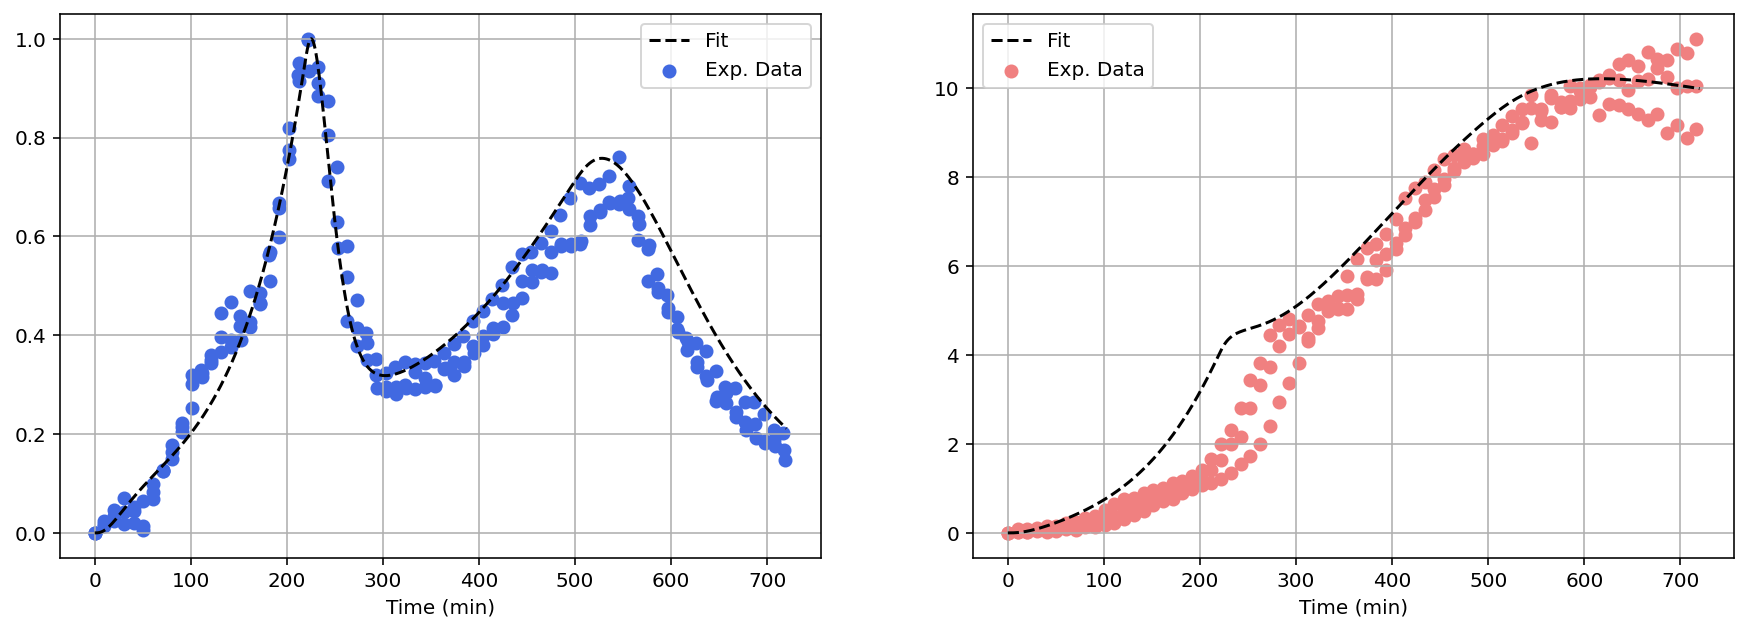

In [88]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
#fig, ax = plt.subplots(2,1, figsize = (8,12))


ax[0].plot(timepoints[:tf_I], sol_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), '--', label = "Fit", color = 'black')
ax[0].scatter(time_A[0][:tf_i], A_non_leaky[0][:tf_i]/np.max(A_non_leaky[2]), color = 'royalblue', label = 'Exp. Data')
ax[0].scatter(time_A[1][:tf_i], A_non_leaky[1][:tf_i]/np.max(A_non_leaky[2]), color = 'royalblue')
ax[0].scatter(time_A[2][:tf_i], A_non_leaky[2][:tf_i]/np.max(A_non_leaky[2]), color = 'royalblue')
ax[0].set_xlabel('Time (min)'); ax[0].grid(True) ; ax[0].legend()


ax[1].plot(timepoints[:tf_I], sol_no_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), '--', label = "Fit", color = 'black')
ax[1].scatter(time_B[0][:tf_i], B_non_leaky[0][:tf_i]/np.max(A_non_leaky[2]), color = 'lightcoral', label = 'Exp. Data')
ax[1].scatter(time_B[1][:tf_i], B_non_leaky[1][:tf_i]/np.max(A_non_leaky[2]), color = 'lightcoral')
ax[1].scatter(time_B[2][:tf_i], B_non_leaky[2][:tf_i]/np.max(A_non_leaky[2]), color = 'lightcoral')
ax[1].set_xlabel('Time (min)'); ax[1].grid(True) ; ax[1].legend()

#fig.savefig("GEAGS_qualitative_comparison.png")

In [89]:
# ## To export the scaled model prediction along with scaled experimental data

# GEAGS_model = dict()
# GEAGS_exp = dict()

# # Deg-tagged protein prediction 

# GEAGS_model['Scaled_deg_tag_protein'] = sol_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X'])
# GEAGS_exp['A1'] = A_non_leaky[0][:tf_i].reshape(-1)/A_max
# GEAGS_exp['A2'] = A_non_leaky[1][:tf_i].reshape(-1)/A_max
# GEAGS_exp['A3'] = A_non_leaky[2][:tf_i].reshape(-1)/A_max

# # Non Deg-tagged protein prediction 

# GEAGS_model['Scaled_no_deg_tag_protein'] = sol_no_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X'])
# GEAGS_exp['B1'] = B_non_leaky[0][:tf_i].reshape(-1)/A_max
# GEAGS_exp['B2'] = B_non_leaky[1][:tf_i].reshape(-1)/A_max
# GEAGS_exp['B3'] = B_non_leaky[2][:tf_i].reshape(-1)/A_max

# GEAGS_model['Time_model'] = timepoints[:tf_I]
# GEAGS_exp['Time_exp'] = time_A[0][:tf_i].reshape(-1)


# GEAGS_model_df = pd.DataFrame(data = GEAGS_model)
# GEAGS_model_df.to_csv('simulation_scaled_data.csv')

# GEAGS_exp_df = pd.DataFrame(data = GEAGS_exp)
# GEAGS_exp_df.to_csv('expt_scaled_data.csv')


In [90]:
# Print the fold change between protein from the model comparison
np.max(sol_no_deg['protein_X'])/np.max(sol_deg['protein_X'])

10.203106486504113

In [91]:
## Command to export the complete simulation run data

# sol_deg_run_data = pd.DataFrame(sol_deg)
# sol_deg_run_data.to_csv('GEAGS_sol_deg_run_data_062724.csv')

# sol_no_deg_run_data = pd.DataFrame(sol_no_deg)
# sol_no_deg_run_data.to_csv('GEAGS_sol_no_deg_run_data_062724.csv')

In [92]:
## Plotting the values of parameters in the model 
param_dict_biocrnpyler = model_degtag.get_parameter_dictionary()
list(param_dict_biocrnpyler.keys())

['k_tx_1b__bacterial_transcription',
 'k_tx_1u__bacterial_transcription',
 'RNAP_max__bacterial_transcription',
 'n_gamma_RNAP__bacterial_transcription',
 'c_max__logistic_cell_growth',
 'k_tx_2b__bacterial_transcription',
 'k_tx_2u__bacterial_transcription',
 'b_tx_4u__mrna_degradation',
 'n_delta__bacterial_transcription',
 'k_tx_3__bacterial_transcription',
 'k_tl_1b__bacterial_translation',
 'k_tl_1u__bacterial_translation',
 'Et_max__bacterial_translation',
 'n_gamma_Et__bacterial_translation',
 'k_tl_2b__bacterial_translation',
 'k_tl_2u__bacterial_translation',
 'tRNA_max__bacterial_translation',
 'n_gamma_tRNA__bacterial_translation',
 'k_tl_3b__bacterial_translation',
 'k_tl_3u__bacterial_translation',
 'Ribo_max__bacterial_translation',
 'n_gamma_Ribo__bacterial_translation',
 'k_tl_4__bacterial_translation',
 'k_tl_5__bacterial_translation',
 'b_tl_5__bacterial_translation',
 'n_gamma_folding__bacterial_translation',
 'k_tl_8__bacterial_translation',
 'n_gamma_syn__bacterial

In [93]:
## Plotting the names of species in the model 
model_degtag.get_species_dictionary()

{'dna_X': 100.0,
 'protein_sigma_machinery': 135.0,
 'protein_holoenzyme_machinery': 0.0,
 'protein_NT_units': 942.0,
 'rna_T_X': 0.0,
 'complex_dna_X_protein_holoenzyme_machinery_': 0.0,
 'protein_AA_units0tl': 85610.0,
 'protein_X': 0.0,
 'protein_unfolded_protein_degtag': 0.0,
 'protein_peptide_chain_peptide': 0.0,
 'protein_Ct_machinery': 0.0,
 'protein_Caa_machinery': 0.0,
 'protein_Ctic_machinery': 0.0,
 'protein_C_deg_unfolded_machinery': 0.0,
 'protein_C_deg_folded_machinery': 0.0,
 'protein_RNAase_machinery': 90.0,
 'cell_count_count': 6666666.666666669,
 'complex_dna_X_protein_holoenzyme_machinery_open_': 0.0,
 'complex_protein_RNAase_machinery_rna_T_X_': 0.0}

### With deg-tag

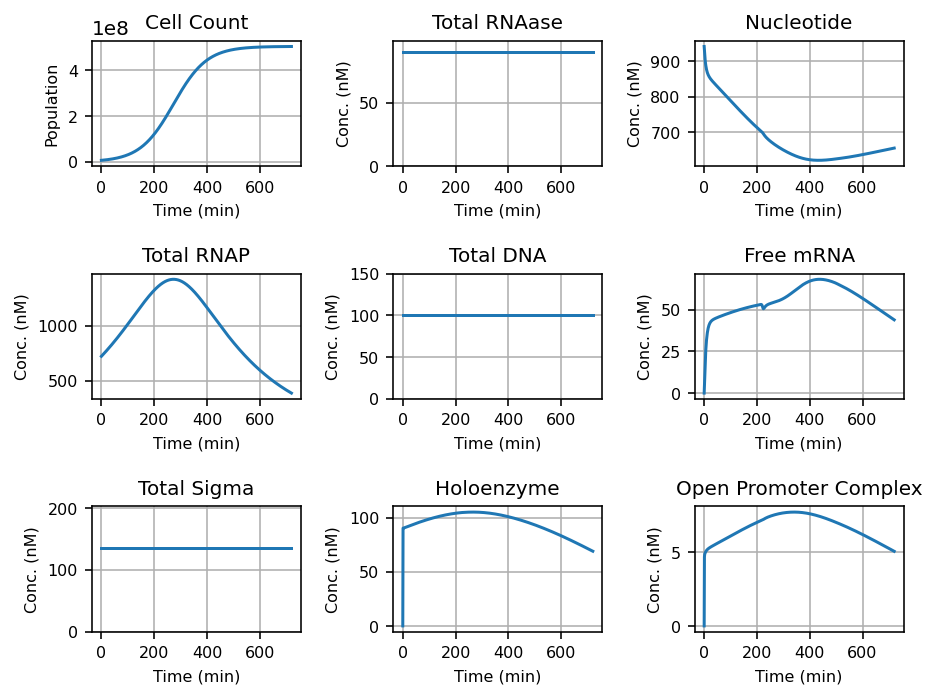

In [94]:
# --- Settings ---
w, h = 6.5, 5  # Set figure width and height
fontsize_labels = 8
fontsize_ticks = 8
fontsize_titles = 10

# --- Compute Total RNAP (bound + unbound) ---
fraction = sol_deg['cell_count_count'] / param_dict_biocrnpyler['c_max__logistic_cell_growth']
growth_term = fraction * (1 - fraction)
scaled_growth = np.power(growth_term, param_dict_biocrnpyler['n_gamma_RNAP__bacterial_transcription'])
RNAP_total = param_dict_biocrnpyler['RNAP_max__bacterial_transcription'] * scaled_growth

# --- Compute Totals ---
DNA_total = sol_deg['dna_X'] + sol_deg['complex_dna_X_protein_holoenzyme_machinery_open_']
sigma_total = (
    sol_deg['protein_sigma_machinery'] +
    sol_deg['protein_holoenzyme_machinery'] +
    sol_deg['complex_dna_X_protein_holoenzyme_machinery_open_']
)
rnaase_total = (
    sol_deg['protein_RNAase_machinery'] +
    sol_deg['complex_protein_RNAase_machinery_rna_T_X_']
)

# --- Plotting ---
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(w, h))

# Define what to plot in each subplot: (data, title, y_label_override)
plots = [
    [(sol_deg['cell_count_count'],      "Cell Count", "Population"),
     (rnaase_total,                     "Total RNAase", None),
     (sol_deg['protein_NT_units'],     "Nucleotide", None)],
    
    [(RNAP_total,                       "Total RNAP", None),
     (DNA_total,                        "Total DNA", None),
     (sol_deg['rna_T_X'],              "Free mRNA", None)],
    
    [(sigma_total,                      "Total Sigma", None),
     (sol_deg['protein_holoenzyme_machinery'], "Holoenzyme", None),
     (sol_deg['complex_dna_X_protein_holoenzyme_machinery_open_'], "Open Promoter Complex", None)]
]

# --- Apply plots and formatting ---
for i in range(3):
    for j in range(3):
        data, title, y_override = plots[i][j]
        ax_ij = ax[i][j]
        ax_ij.plot(timepoints, data)
        
        # Titles and labels
        ax_ij.set_title(title, fontsize=fontsize_titles)
        ax_ij.set_xlabel("Time (min)", fontsize=fontsize_labels)
        if y_override:
            ax_ij.set_ylabel(y_override, fontsize=fontsize_labels)
        else:
            ax_ij.set_ylabel("Conc. (nM)", fontsize=fontsize_labels)
        
        ax_ij.tick_params(axis='both', labelsize=fontsize_ticks)
        ax_ij.grid(True)

        # Optional custom y-axis limits
        if title == "Total RNAase":
            ax_ij.set_ylim(0, np.max(rnaase_total) * 1.1)
        elif title == "Total DNA":
            ax_ij.set_ylim(0, 150)
        elif title == "Total Sigma":
            ax_ij.set_ylim(0, np.max(sigma_total) * 1.5)

plt.tight_layout()
#fig.savefig('TX_species_GEC_aav.svg', dpi = 300)


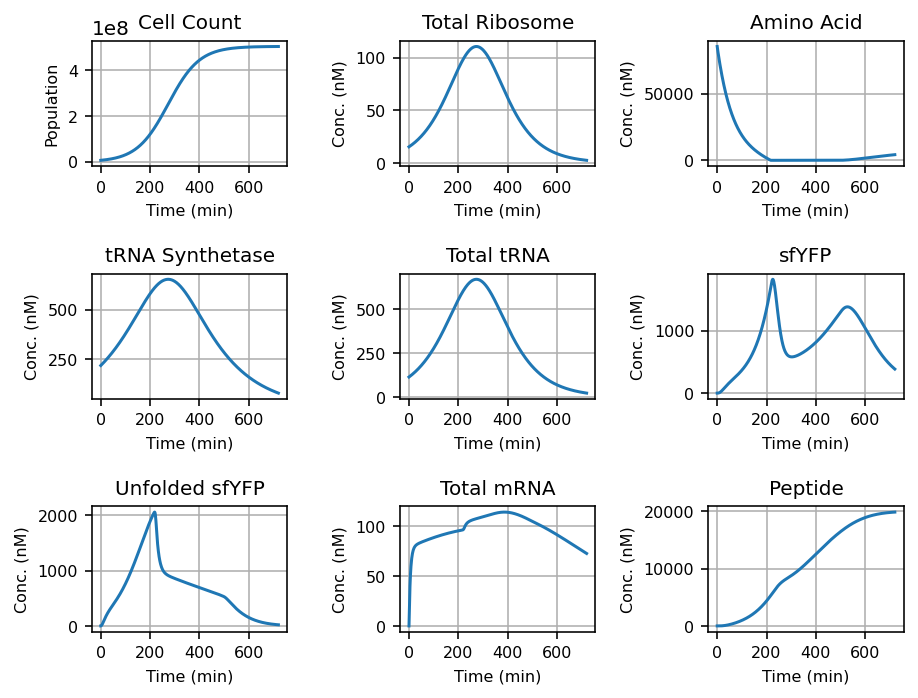

In [95]:
# --- Settings ---
w, h = 6.5, 5  # Set figure width and height
fontsize_labels = 8
fontsize_ticks = 8
fontsize_titles = 10

# --- Compute Growth-Dependent Variables ---
fraction = sol_deg['cell_count_count'] / param_dict_biocrnpyler['c_max__logistic_cell_growth']
growth_term = fraction * (1 - fraction)

y_Ribo = np.power(growth_term, param_dict_biocrnpyler['n_gamma_Ribo__bacterial_translation'])
Ribo_total = param_dict_biocrnpyler['Ribo_max__bacterial_translation'] * y_Ribo

y_tRNA = np.power(growth_term, param_dict_biocrnpyler['n_gamma_tRNA__bacterial_translation'])
tRNA_total = param_dict_biocrnpyler['tRNA_max__bacterial_translation'] * y_tRNA

y_Et = np.power(growth_term, param_dict_biocrnpyler['n_gamma_Et__bacterial_translation'])
Et_total = param_dict_biocrnpyler['Et_max__bacterial_translation'] * y_Et

# --- Compute Totals ---
mrna_total = (
    sol_deg['rna_T_X'] +
    sol_deg['protein_Ctic_machinery'] +
    sol_deg['complex_protein_RNAase_machinery_rna_T_X_']
)

aa_total = (
    sol_deg['protein_AA_units0tl'] +
    sol_deg['protein_Caa_machinery'] +
    sol_deg['protein_Ct_machinery']
)

# --- Plotting ---
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(w, h))

# Define what to plot in each subplot: (data, title, y_label_override)
plots = [
    [(sol_deg['cell_count_count'],      "Cell Count", "Population"),
     (Ribo_total,                       "Total Ribosome", None),
     (sol_deg['protein_AA_units0tl'],  "Amino Acid", None)],
    
    [(Et_total,                         "tRNA Synthetase", None),
     (tRNA_total,                       "Total tRNA", None),
     (sol_deg['protein_X'],            "sfYFP", None)],
    
    [(sol_deg['protein_unfolded_protein_degtag'], "Unfolded sfYFP", None),
     (mrna_total,                       "Total mRNA", None),
     (sol_deg['protein_peptide_chain_peptide'], "Peptide", None)]
]

# --- Apply plots and formatting ---
for i in range(3):
    for j in range(3):
        data, title, y_override = plots[i][j]
        ax_ij = ax[i][j]
        ax_ij.plot(timepoints, data)

        # Titles and labels
        ax_ij.set_title(title, fontsize=fontsize_titles)
        ax_ij.set_xlabel("Time (min)", fontsize=fontsize_labels)
        if y_override:
            ax_ij.set_ylabel(y_override, fontsize=fontsize_labels)
        else:
            ax_ij.set_ylabel("Conc. (nM)", fontsize=fontsize_labels)

        # Ticks and grid
        ax_ij.tick_params(axis='both', labelsize=fontsize_ticks)
        ax_ij.grid(True)

plt.tight_layout()
#fig.savefig('TL_species_GEC_aav.svg', dpi=300)


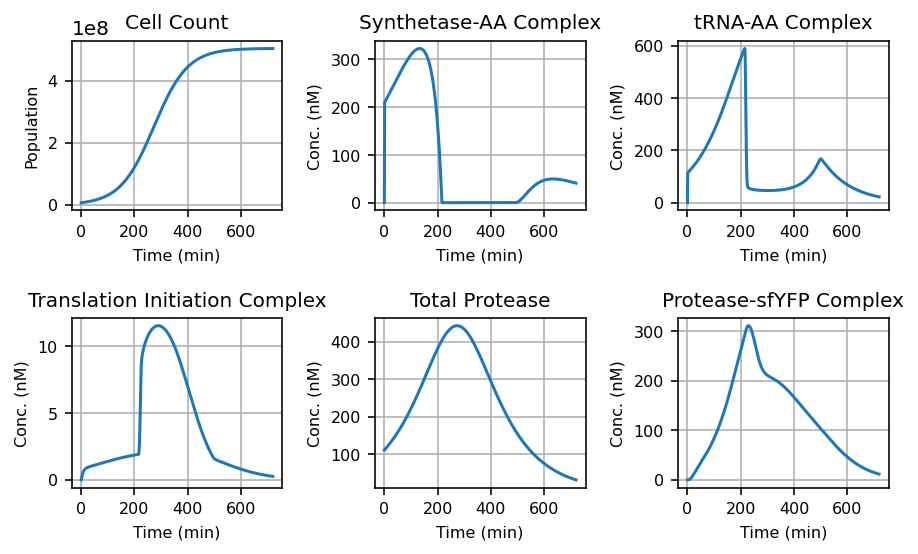

In [96]:
# --- Settings ---
w, h = 6.5, 4  # Set figure width and height
fontsize_labels = 8
fontsize_ticks = 8
fontsize_titles = 10

# --- Compute growth-dependent protease ---
y_Protease = np.power(growth_term, param_dict_biocrnpyler['n_gamma_Protease__bacterial_translation'])
Protease_total = param_dict_biocrnpyler['Protease_max__bacterial_translation'] * y_Protease

# --- Compute degradation complex ---
deg_complex = (
    sol_deg['protein_C_deg_unfolded_machinery'] +
    sol_deg['protein_C_deg_folded_machinery']
)

# --- Plotting ---
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(w, h))

# Define what to plot in each subplot: (data, title, y_label_override)
plots = [
    [(sol_deg['cell_count_count'],        "Cell Count", "Population"),
     (sol_deg['protein_Ct_machinery'],    "Synthetase-AA Complex", None),
     (sol_deg['protein_Caa_machinery'],   "tRNA-AA Complex", None)],
    
    [(sol_deg['protein_Ctic_machinery'],  "Translation Initiation Complex", None),
     (Protease_total,                     "Total Protease", None),
     (deg_complex,                        "Protease-sfYFP Complex", None)]
]

# --- Apply plots and formatting ---
for i in range(2):
    for j in range(3):
        data, title, y_override = plots[i][j]
        ax_ij = ax[i][j]
        ax_ij.plot(timepoints, data)

        # Titles and labels
        ax_ij.set_title(title, fontsize=fontsize_titles)
        ax_ij.set_xlabel("Time (min)", fontsize=fontsize_labels)
        if y_override:
            ax_ij.set_ylabel(y_override, fontsize=fontsize_labels)
        else:
            ax_ij.set_ylabel("Conc. (nM)", fontsize=fontsize_labels)

        ax_ij.tick_params(axis='both', labelsize=fontsize_ticks)
        ax_ij.grid(True)

plt.tight_layout()
#fig.savefig('TL_intermediate_species_GEC_aav.svg', dpi=300)

In [97]:
# ## Export the data for plotting the results in datagraph (first 720 minutes only) 

# GEAGS_run_data_720min_deg_tag = dict()

# # Transcription related  species 
# GEAGS_run_data_720min_deg_tag['RNAP_total'] = RNAP_total[:tf_I]
# GEAGS_run_data_720min_deg_tag['Sigma_total'] = sigma_total[:tf_I]
# GEAGS_run_data_720min_deg_tag['DNA_total'] =  DNA_total[:tf_I]
# GEAGS_run_data_720min_deg_tag['Nucleotide'] = sol_deg['protein_NT_units'][:tf_I]
# GEAGS_run_data_720min_deg_tag['mRNA_total'] = mrna_total[:tf_I]
# GEAGS_run_data_720min_deg_tag['RNAase_total'] = rnaase_total[:tf_I]

# # Translation related  species 
# GEAGS_run_data_720min_deg_tag['Ribosome_total'] = Ribo_total[:tf_I]
# GEAGS_run_data_720min_deg_tag['tRNA_total'] = tRNA_total[:tf_I]
# GEAGS_run_data_720min_deg_tag['tRNA_synthetase_total'] = Et_total[:tf_I]
# GEAGS_run_data_720min_deg_tag['Unfolded_protein'] = sol_deg['protein_unfolded_protein_degtag'][:tf_I]
# GEAGS_run_data_720min_deg_tag['Folded_protein'] = sol_deg['protein_X'][:tf_I]
# GEAGS_run_data_720min_deg_tag['Peptide_chain'] = sol_deg['protein_peptide_chain_peptide'][:tf_I]
# GEAGS_run_data_720min_deg_tag['Amino_acid'] = sol_deg['protein_AA_units0tl'][:tf_I]
# GEAGS_run_data_720min_deg_tag['Protease_total'] = Protease_total[:tf_I]

# # Transcription itermediate complexes
# GEAGS_run_data_720min_deg_tag['Holoenzyme'] = sol_deg['protein_holoenzyme_machinery'][:tf_I]
# GEAGS_run_data_720min_deg_tag['Open_promoter_complex'] = sol_deg['complex_dna_X_protein_holoenzyme_machinery_open_'][:tf_I]
# GEAGS_run_data_720min_deg_tag['mRNA_RNAase_complex'] = sol_deg['complex_protein_RNAase_machinery_rna_T_X_'][:tf_I]

# # Translation itermediate complexes
# GEAGS_run_data_720min_deg_tag['Et_AA_complex'] = sol_deg['protein_Ct_machinery'][:tf_I]
# GEAGS_run_data_720min_deg_tag['tRNA_AA_complex'] = sol_deg['protein_Caa_machinery'][:tf_I]
# GEAGS_run_data_720min_deg_tag['Translation_initiation_complex'] = sol_deg['protein_Ctic_machinery'][:tf_I]
# GEAGS_run_data_720min_deg_tag['Protease_protein_complex'] = deg_complex[:tf_I]

# GEAGS_run_data_720min_deg_tag['Cells'] = sol_deg['cell_count_count']

# GEAGS_run_data_720min_deg_tag['Time'] = timepoints[:tf_I]

# GEAGS_run_data_720min_deg_tag_df = pd.DataFrame(data = GEAGS_run_data_720min_deg_tag)
# GEAGS_run_data_720min_deg_tag_df.to_csv('simulation_run_data_720min_deg_tag_030725_28800_points.csv')


### Without deg-tag

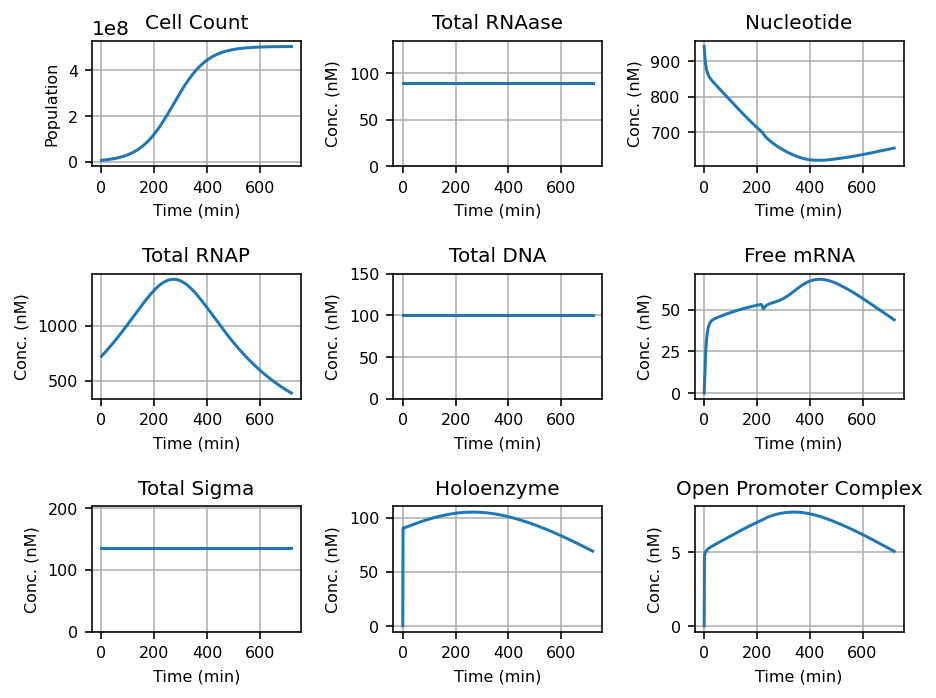

In [98]:
# --- Settings ---
w, h = 6.5, 5  # Set figure width and height
fontsize_labels = 8
fontsize_ticks = 8
fontsize_titles = 10

# --- Compute Total RNAP (bound + unbound) ---
y_RNAP = np.power(growth_term, param_dict_biocrnpyler['n_gamma_RNAP__bacterial_transcription'])
RNAP_total = param_dict_biocrnpyler['RNAP_max__bacterial_transcription'] * y_RNAP

# --- Compute Totals ---
DNA_total = sol_no_deg['dna_X'] + sol_no_deg['complex_dna_X_protein_holoenzyme_machinery_open_']

sigma_total = (
    sol_no_deg['protein_sigma_machinery'] +
    sol_no_deg['protein_holoenzyme_machinery'] +
    sol_no_deg['complex_dna_X_protein_holoenzyme_machinery_open_']
)

rnaase_total = (
    sol_no_deg['protein_RNAase_machinery'] +
    sol_no_deg['complex_protein_RNAase_machinery_rna_T_X_']
)

# --- Plotting ---
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(w, h))

# Define what to plot in each subplot: (data, title, y_label_override)
plots = [
    [(sol_no_deg['cell_count_count'],    "Cell Count", "Population"),
     (rnaase_total,                      "Total RNAase", None),
     (sol_no_deg['protein_NT_units'],    "Nucleotide", None)],
    
    [(RNAP_total,                         "Total RNAP", None),
     (DNA_total,                          "Total DNA", None),
     (sol_no_deg['rna_T_X'],             "Free mRNA", None)],
    
    [(sigma_total,                        "Total Sigma", None),
     (sol_no_deg['protein_holoenzyme_machinery'], "Holoenzyme", None),
     (sol_no_deg['complex_dna_X_protein_holoenzyme_machinery_open_'], "Open Promoter Complex", None)]
]

# --- Apply plots and formatting ---
for i in range(3):
    for j in range(3):
        data, title, y_override = plots[i][j]
        ax_ij = ax[i][j]
        ax_ij.plot(timepoints, data)

        # Set title and labels
        ax_ij.set_title(title, fontsize=fontsize_titles)
        ax_ij.set_xlabel("Time (min)", fontsize=fontsize_labels)
        if y_override:
            ax_ij.set_ylabel(y_override, fontsize=fontsize_labels)
        else:
            ax_ij.set_ylabel("Conc. (nM)", fontsize=fontsize_labels)

        # Ticks and grid
        ax_ij.tick_params(axis='both', labelsize=fontsize_ticks)
        ax_ij.grid(True)

        # Custom y-limits
        if title == "Total RNAase":
            ax_ij.set_ylim(0, np.max(rnaase_total) * 1.5)
        elif title == "Total DNA":
            ax_ij.set_ylim(0, 150)
        elif title == "Total Sigma":
            ax_ij.set_ylim(0, np.max(sigma_total) * 1.5)

plt.tight_layout()
#fig.savefig("TX_species_GEC_no_tag.svg", dpi=300)

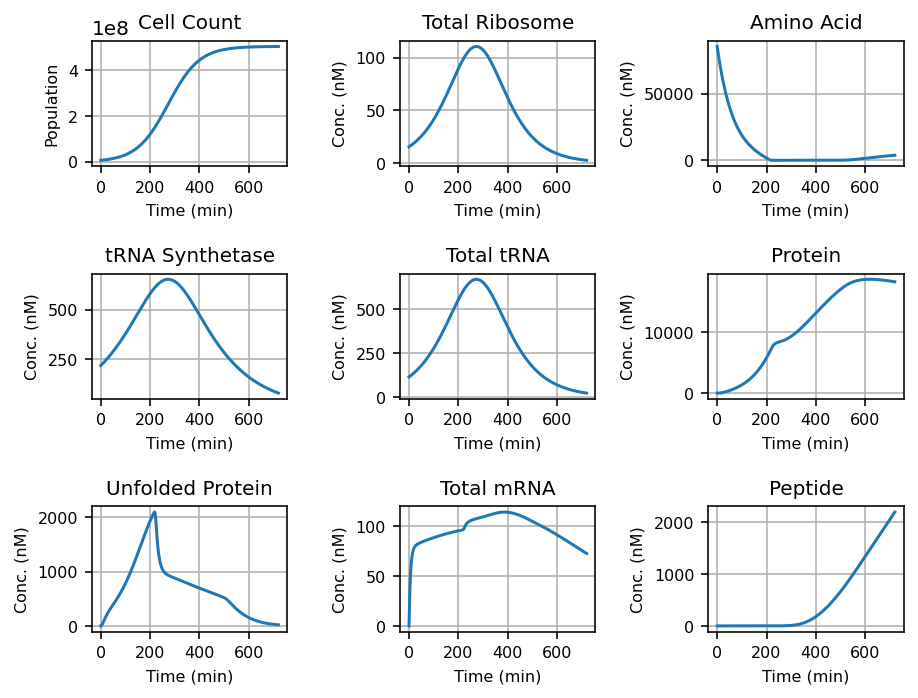

In [99]:
# --- Settings ---
w, h = 6.5, 5  # Set figure width and height
fontsize_labels = 8
fontsize_ticks = 8
fontsize_titles = 10

# --- Compute Total Ribosome (bound + unbound) ---
y_Ribo = np.power(growth_term, param_dict_biocrnpyler['n_gamma_Ribo__bacterial_translation'])
Ribo_total = param_dict_biocrnpyler['Ribo_max__bacterial_translation'] * y_Ribo

# --- Compute Total tRNA (bound + unbound) ---
y_tRNA = np.power(growth_term, param_dict_biocrnpyler['n_gamma_tRNA__bacterial_translation'])
tRNA_total = param_dict_biocrnpyler['tRNA_max__bacterial_translation'] * y_tRNA

# --- Compute Total tRNA synthetase ---
y_Et = np.power(growth_term, param_dict_biocrnpyler['n_gamma_Et__bacterial_translation'])
Et_total = param_dict_biocrnpyler['Et_max__bacterial_translation'] * y_Et

# --- Compute Total mRNA (bound + unbound) ---
mrna_total = (
    sol_no_deg['rna_T_X'] +
    sol_no_deg['protein_Ctic_machinery'] +
    sol_no_deg['complex_protein_RNAase_machinery_rna_T_X_']
)

# --- Compute Total Amino Acid ---
aa_total = (
    sol_no_deg['protein_AA_units0tl'] +
    sol_no_deg['protein_Caa_machinery'] +
    sol_no_deg['protein_Ct_machinery']
)

# --- Plotting ---
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(w, h))

# Define what to plot in each subplot: (data, title, y_label_override)
plots = [
    [(sol_no_deg['cell_count_count'],      "Cell Count", "Population"),
     (Ribo_total,                          "Total Ribosome", None),
     (sol_no_deg['protein_AA_units0tl'],   "Amino Acid", None)],
    
    [(Et_total,                            "tRNA Synthetase", None),
     (tRNA_total,                          "Total tRNA", None),
     (sol_no_deg['protein_X'],            "Protein", None)],
    
    [(sol_no_deg['protein_unfolded_protein_degtag'], "Unfolded Protein", None),
     (mrna_total,                          "Total mRNA", None),
     (sol_no_deg['protein_peptide_chain_peptide'], "Peptide", None)]
]

# --- Apply plots and formatting ---
for i in range(3):
    for j in range(3):
        data, title, y_override = plots[i][j]
        ax_ij = ax[i][j]
        ax_ij.plot(timepoints, data)

        # Title and axis labels
        ax_ij.set_title(title, fontsize=fontsize_titles)
        ax_ij.set_xlabel("Time (min)", fontsize=fontsize_labels)
        if y_override:
            ax_ij.set_ylabel(y_override, fontsize=fontsize_labels)
        else:
            ax_ij.set_ylabel("Conc. (nM)", fontsize=fontsize_labels)

        ax_ij.tick_params(axis='both', labelsize=fontsize_ticks)
        ax_ij.grid(True)

plt.tight_layout()
#fig.savefig("TL_species_GEC_no_tag.svg", dpi=300)


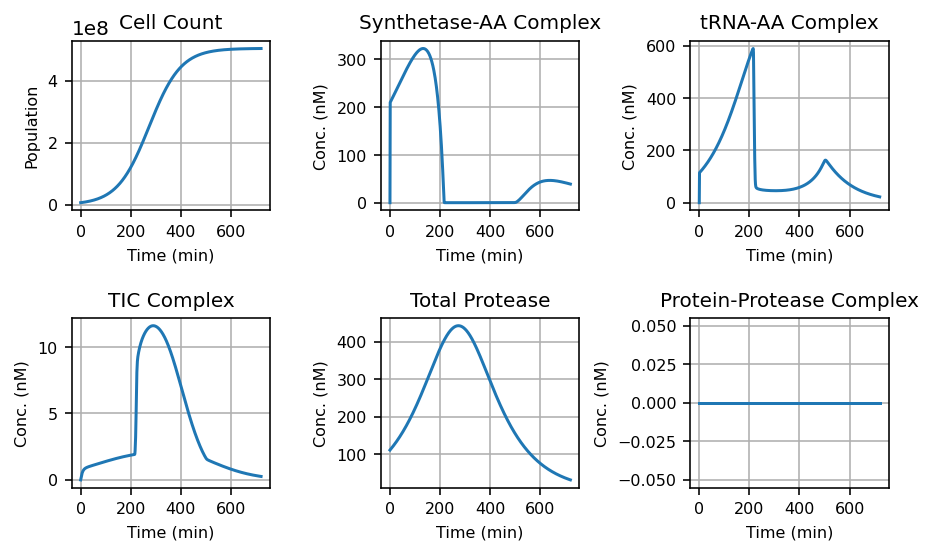

In [100]:
# --- Settings ---
w, h = 6.5, 4  # Set figure width and height
fontsize_labels = 8
fontsize_ticks = 8
fontsize_titles = 10

# --- Compute growth-dependent protease ---
y_Protease = np.power(growth_term, param_dict_biocrnpyler['n_gamma_Protease__bacterial_translation'])
Protease_total = param_dict_biocrnpyler['Protease_max__bacterial_translation'] * y_Protease

# --- Compute degradation complex ---
deg_complex = (
    sol_no_deg['protein_C_deg_unfolded_machinery'] +
    sol_no_deg['protein_C_deg_folded_machinery']
)

# --- Plotting ---
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(w, h))

# Define what to plot in each subplot: (data, title, y_label_override)
plots = [
    [(sol_no_deg['cell_count_count'],      "Cell Count", "Population"),
     (sol_no_deg['protein_Ct_machinery'],  "Synthetase-AA Complex", None),
     (sol_no_deg['protein_Caa_machinery'], "tRNA-AA Complex", None)],
    
    [(sol_no_deg['protein_Ctic_machinery'], "TIC Complex", None),
     (Protease_total,                      "Total Protease", None),
     (deg_complex,                         "Protein-Protease Complex", None)]
]

# --- Apply plots and formatting ---
for i in range(2):
    for j in range(3):
        data, title, y_override = plots[i][j]
        ax_ij = ax[i][j]
        ax_ij.plot(timepoints, data)

        # Title and axis labels
        ax_ij.set_title(title, fontsize=fontsize_titles)
        ax_ij.set_xlabel("Time (min)", fontsize=fontsize_labels)
        if y_override:
            ax_ij.set_ylabel(y_override, fontsize=fontsize_labels)
        else:
            ax_ij.set_ylabel("Conc. (nM)", fontsize=fontsize_labels)

        ax_ij.tick_params(axis='both', labelsize=fontsize_ticks)
        ax_ij.grid(True)

plt.tight_layout()
#fig.savefig("TL_intermediate_species_GEC_no_tag.svg", dpi=300)


In [101]:
# ## Export the data for plotting the results in datagraph (first 720 minutes only) 

# GEAGS_run_data_720min_no_deg_tag = dict()

# # Transcription related  species 
# GEAGS_run_data_720min_no_deg_tag['RNAP_total'] = RNAP_total[:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Sigma_total'] = sigma_total[:tf_I]
# GEAGS_run_data_720min_no_deg_tag['DNA_total'] =  DNA_total[:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Nucleotide'] = sol_no_deg['protein_NT_units'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['mRNA_total'] = mrna_total[:tf_I]
# GEAGS_run_data_720min_no_deg_tag['RNAase_total'] = rnaase_total[:tf_I]

# # Translation related  species 
# GEAGS_run_data_720min_no_deg_tag['Ribosome_total'] = Ribo_total[:tf_I]
# GEAGS_run_data_720min_no_deg_tag['tRNA_total'] = tRNA_total[:tf_I]
# GEAGS_run_data_720min_no_deg_tag['tRNA_synthetase_total'] = Et_total[:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Unfolded_protein'] = sol_no_deg['protein_unfolded_protein_degtag'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Folded_protein'] = sol_no_deg['protein_X'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Peptide_chain'] = sol_no_deg['protein_peptide_chain_peptide'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Amino_acid'] = sol_no_deg['protein_AA_units0tl'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Protease_total'] = Protease_total[:tf_I]

# # Transcription itermediate complexes
# GEAGS_run_data_720min_no_deg_tag['Holoenzyme'] = sol_no_deg['protein_holoenzyme_machinery'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Open_promoter_complex'] = sol_no_deg['complex_dna_X_protein_holoenzyme_machinery_open_'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['mRNA_RNAase_complex'] = sol_no_deg['complex_protein_RNAase_machinery_rna_T_X_'][:tf_I]

# # Translation itermediate complexes
# GEAGS_run_data_720min_no_deg_tag['Et_AA_complex'] = sol_no_deg['protein_Ct_machinery'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['tRNA_AA_complex'] = sol_no_deg['protein_Caa_machinery'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Translation_initiation_complex'] = sol_no_deg['protein_Ctic_machinery'][:tf_I]

# GEAGS_run_data_720min_no_deg_tag['Cells'] = sol_no_deg['cell_count_count']

# GEAGS_run_data_720min_no_deg_tag['Time'] = timepoints[:tf_I]

# GEAGS_run_data_720min_no_deg_tag_df = pd.DataFrame(data = GEAGS_run_data_720min_no_deg_tag)
# GEAGS_run_data_720min_no_deg_tag_df.to_csv('simulation_run_data_720min_no_deg_tag_030725_28800_points.csv')


In [102]:
## Plot the values of parameters in the model 
model_degtag.get_parameter_dictionary()

{'k_tx_1b__bacterial_transcription': 0.05061,
 'k_tx_1u__bacterial_transcription': 14.081,
 'RNAP_max__bacterial_transcription': 1960.0,
 'n_gamma_RNAP__bacterial_transcription': 0.23,
 'c_max__logistic_cell_growth': 503666666.6666667,
 'k_tx_2b__bacterial_transcription': 0.0019382,
 'k_tx_2u__bacterial_transcription': 0.09999,
 'b_tx_4u__mrna_degradation': 1.0,
 'n_delta__bacterial_transcription': 5.5,
 'k_tx_3__bacterial_transcription': 0.003597,
 'k_tl_1b__bacterial_translation': 0.002793,
 'k_tl_1u__bacterial_translation': 11.48224,
 'Et_max__bacterial_translation': 1090.0,
 'n_gamma_Et__bacterial_translation': 0.37,
 'k_tl_2b__bacterial_translation': 8.24109,
 'k_tl_2u__bacterial_translation': 35.1135,
 'tRNA_max__bacterial_translation': 1535.0,
 'n_gamma_tRNA__bacterial_translation': 0.6,
 'k_tl_3b__bacterial_translation': 0.04287,
 'k_tl_3u__bacterial_translation': 12.3438,
 'Ribo_max__bacterial_translation': 280.0,
 'n_gamma_Ribo__bacterial_translation': 0.67,
 'k_tl_4__bacteri

### Some analyses done with the model

In [103]:
## Export the parameter values 

param_dict = params.valuesdict()
# param_dict_guess_df = dict()
# param_dict_guess_df['Param name'] = param_dict.keys()
# param_dict_guess_df['Param'] = param_dict.values()
# param_data = pd.DataFrame(data = param_dict_guess_df)
# param_data.to_csv('model_param_file_030525.csv')
param_dict

{'n_gamma_RNAP': 0.23,
 'n_gamma_Et': 0.37,
 'n_gamma_tRNA': 0.6,
 'n_gamma_Ribo': 0.67,
 'n_gamma_Protease': 0.47,
 'Sigma_IC': 135.0,
 'NT_IC': 942.0,
 'RNAase_IC': 90.0,
 'AA_IC': 85610.0,
 'Ribo_max': 280.0,
 'tRNA_max': 1535.0,
 'RNAP_max': 1960.0,
 'Et_max': 1090.0,
 'Protease_max': 850.0,
 'k_tx_1b': 0.05061,
 'k_tx_1u': 14.081,
 'k_tx_2b': 0.0019382,
 'k_tx_2u': 0.09999,
 'k_tx_3': 0.003597,
 'k_tx_4b': 2.54926,
 'k_tx_4u': 161.36218,
 'k_tx_5': 0.42521,
 'k_tl_1b': 0.002793,
 'k_tl_1u': 11.48224,
 'k_tl_2u': 35.1135,
 'k_tl_2b': 8.24109,
 'k_tl_3b': 0.04287,
 'k_tl_3u': 12.3438,
 'k_tl_4': 0.17,
 'k_tl_5': 0.10047,
 'b_tl_5': 0.5007,
 'k_tl_6': 0.4,
 'k_tl_7': 0.0008,
 'k_tl_8': 138.0,
 'k_tl_9b_P': 0.000454,
 'k_tl_9b_Pm': 0.01671,
 'k_tl_9u': 10.2873,
 'k_tl_10': 0.0001,
 'n_gamma_folding': 0.26,
 'n_gamma_syn': 0.296,
 'C_max': 503666666.6666667,
 'C_0': 6666666.67,
 'k_gr': 0.015781}

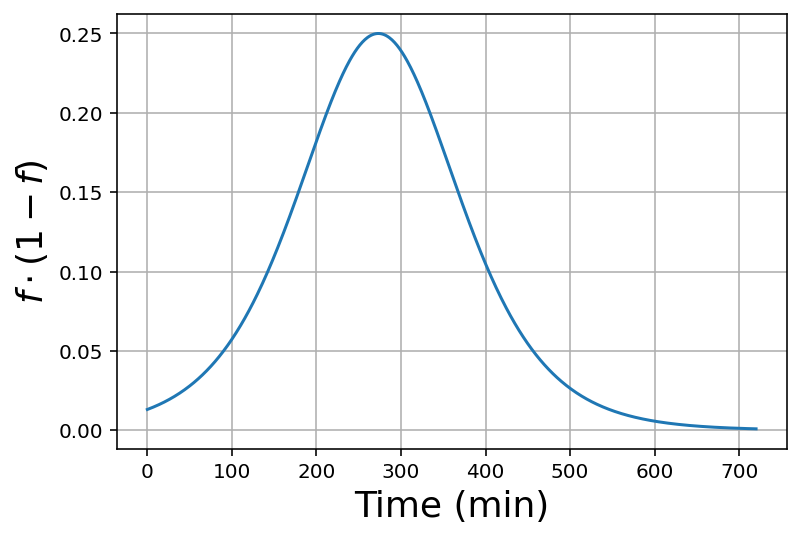

In [104]:
## Plot the RMF gamma 

f = sol_deg['cell_count_count']/param_dict['C_max']

plt.plot(timepoints, f * (1 - f))
plt.xlabel('Time (min)', fontsize = 18)
plt.ylabel(r'$f \cdot (1 -f)$', fontsize = 18)
plt.grid(True)

In [105]:
## Comparing the amino acid replenishment in both models 

gamma = f * (1 - f)
gamma_n_syn = np.power(gamma, param_dict['n_gamma_syn'])
delta = f**5.5/(1 + f**5.5)

# Amino acid synthesis and recycle in deg tagged construct
k_rep_sol_deg = param_dict['k_tl_8'] * gamma_n_syn
k_rec_sol_deg = param_dict['k_tl_10'] * sol_deg['protein_peptide_chain_peptide']

# Amino acid synthesis and recycle in non tagged construct
k_rep_sol_no_deg = param_dict['k_tl_8'] * gamma_n_syn
k_rec_sol_no_deg = param_dict['k_tl_10'] * sol_no_deg['protein_peptide_chain_peptide']

# Estimation of the difference in the total replenishment in two constructs 
total_aa_recycle_deg = k_rep_sol_deg + k_rec_sol_deg
total_aa_recycle_no_deg = k_rep_sol_no_deg + k_rec_sol_no_deg

aa_recycle_difference = total_aa_recycle_deg - total_aa_recycle_no_deg

# Estimate the total amino acid in the two cases: 
aa_total_deg = np.zeros(len(sol_deg['protein_X']))
aa_total_deg += sol_deg['protein_AA_units0tl'][:]
aa_total_deg += sol_deg['protein_Ct_machinery'][:]
aa_total_deg += sol_deg['protein_Caa_machinery'][:]

aa_total_no_deg = np.zeros(len(sol_no_deg['protein_X']))
aa_total_no_deg += sol_no_deg['protein_AA_units0tl'][:]
aa_total_no_deg += sol_no_deg['protein_Ct_machinery'][:]
aa_total_no_deg += sol_no_deg['protein_Caa_machinery'][:]

total_aa_conc_difference = aa_total_deg - aa_total_no_deg

<ipython-input-106-a66849277631>:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


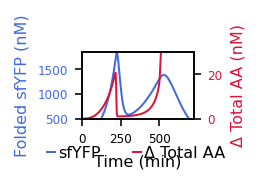

In [106]:
## Plot for figure 3

# --- Line widths and font sizes for clarity ---
lwidth = 1
fontsize_labels = 8
fontsize_ticks = 6
fontsize_legend = 8
w, h = 1, 0.8  # Small figure size for publication

# --- Set figure size for publication ---
fig, ax1 = plt.subplots(figsize=(w, h))  # ~84mm wide for one-column figure

# --- Primary y-axis: Folded Protein ---
line1, = ax1.plot(
    timepoints[:tf_I],
    sol_deg['protein_X'][:tf_I],
    label="sfYFP",
    color='royalblue',
    linewidth=lwidth
)

ax1.set_xlabel('Time (min)', fontsize=fontsize_labels)
ax1.set_ylabel('Folded sfYFP (nM)', fontsize=fontsize_labels, color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue', labelsize=fontsize_ticks)
ax1.tick_params(axis='x', labelsize=fontsize_ticks)
ax1.set_ylim((500, 1850))
ax1.set_xlim((0, 720))

# --- Secondary y-axis: Δ Total AA ---
ax2 = ax1.twinx()

line2, = ax2.plot(
    timepoints[:tf_I],
    total_aa_conc_difference[:tf_I],
    label='Δ Total AA',
    color='crimson',
    linewidth=lwidth
)

ax2.set_ylabel('Δ Total AA (nM)', fontsize=fontsize_labels, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson', labelsize=fontsize_ticks)
ax2.set_ylim((0, 30))
ax2.grid(False)

# --- Combine legends from both axes with compact 2-column layout below plot ---
lines = [line1, line2]
labels = [line.get_label() for line in lines]
fig.legend(
    lines,
    labels,
    loc='lower center',
    fontsize=fontsize_legend,
    frameon=False,
    handlelength=0.5,
    handletextpad=0.2,
    labelspacing=0.1,
    borderaxespad=0.2,
    ncol=2,
    bbox_to_anchor=(0.5, -0.15)  # X=centered, Y=below axes
)

# --- Tight layout with extra space at bottom for legend ---
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Add space for the legend

# --- Save or show ---
#plt.savefig('sfYFP_DeltaTotalAA_dynamics.svg', dpi=600, bbox_inches='tight')

<ipython-input-107-2f666b118107>:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


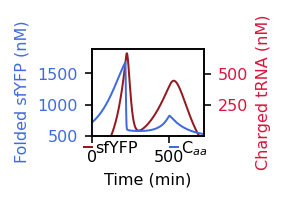

In [107]:
## Plot for figure 3

# --- Line widths and font sizes for clarity ---
lwidth = 1
fontsize_labels = 8
fontsize_ticks = 8
fontsize_legend = 8
w,h = 1, 0.8

# --- Set figure size for publication ---
fig, ax1 = plt.subplots(figsize=(w,h))  # ~84mm wide for one-column figure

# --- Primary y-axis: Folded Protein ---
line1, = ax1.plot(
    timepoints[:tf_I],
    sol_deg['protein_X'][:tf_I],
    label="sfYFP",
    color='#931a20',
    linewidth=lwidth
)

ax1.set_xlabel('Time (min)', fontsize=fontsize_labels)
ax1.set_ylabel('Folded sfYFP (nM)', fontsize=fontsize_labels, color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue', labelsize=fontsize_ticks)
ax1.tick_params(axis='x', labelsize=fontsize_ticks)
ax1.set_ylim((500, 1900))  # Adjust as needed
ax1.set_xlim((0, 720))     # Match the time range of interest

# --- Secondary y-axis: Charged tRNA ---
ax2 = ax1.twinx()

line2, = ax2.plot(
    timepoints[:tf_I],
    sol_deg['protein_Caa_machinery'][:tf_I],
    label='C$_{aa}$',
    color='royalblue',
    linewidth=lwidth
)

ax2.set_ylabel('Charged tRNA (nM)', fontsize=fontsize_labels, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson', labelsize=fontsize_ticks)
ax2.set_ylim((10, 700))  # Adjust as needed
ax2.grid(False)  # Cleaner look — primary axis handles grid

# --- Combine legends from both axes with compact 2-column layout below plot ---
lines = [line1, line2]
labels = [line.get_label() for line in lines]
fig.legend(
    lines,
    labels,
    loc='lower center',
    fontsize=fontsize_legend,
    frameon=False,
    handlelength=0.5,
    handletextpad=0.2,
    labelspacing=0.1,
    borderaxespad=0.2,
    ncol=2,
    bbox_to_anchor=(0.5, -0.15)  # X=centered, Y=below axes
) 

# --- Tight layout for cleaner spacing ---
plt.tight_layout()

# --- Save or show ---
#plt.savefig('sfYFP_Charged_tRNA_dynamics.svg', dpi=600, bbox_inches='tight')

<ipython-input-108-acf79facfb38>:103: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


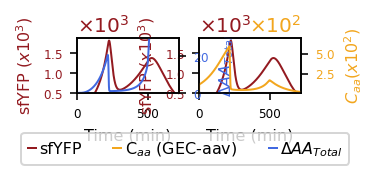

In [108]:
## Plot for figure 3

# --- Custom Colors for Consistency ---
color_sfyfp = '#931a20'
color_caa = '#f2a61e'
color_delta_aa = 'royalblue'

# --- Line widths and font sizes for clarity ---
lwidth = 1
fontsize_labels = 8
fontsize_ticks = 6
fontsize_legend = 8
w_single, h_single = 1, 0.8

# --- Overall figure size for 1x2 layout ---
fig, axes = plt.subplots(1, 2, figsize=(2 * w_single, h_single), sharex=False)

# === Subplot A: sfYFP and Δ Total AA ===
ax1 = axes[0]
ax1.plot(
    timepoints[:tf_I],
    sol_deg['protein_X'][:tf_I],
    color=color_sfyfp,
    linewidth=lwidth
)

ax1.set_xlabel('Time (min)', fontsize=fontsize_labels)
ax1.set_ylabel(r'sfYFP ($x10^{3}$)', fontsize=fontsize_labels, color=color_sfyfp)
ax1.tick_params(axis='y', labelcolor=color_sfyfp, labelsize=fontsize_ticks)
ax1.tick_params(axis='x', labelsize=fontsize_ticks)
ax1.set_ylim((500, 1900))
ax1.set_xlim((0, 720))

ax2 = ax1.twinx()
ax2.plot(
    timepoints[:tf_I],
    total_aa_conc_difference[:tf_I],
    color=color_delta_aa,
    linewidth=lwidth
)
ax2.set_ylabel(r'$\Delta AA_{Total}$', fontsize=fontsize_labels, color=color_delta_aa)
ax2.tick_params(axis='y', labelcolor=color_delta_aa, labelsize=fontsize_ticks)
ax2.set_ylim((0, 30))
ax2.grid(False)

# === Subplot B: sfYFP and Caa ===
ax3 = axes[1]
ax3.plot(
    timepoints[:tf_I],
    sol_deg['protein_X'][:tf_I],
    color=color_sfyfp,
    linewidth=lwidth
)

ax3.set_xlabel('Time (min)', fontsize=fontsize_labels)
ax3.set_ylabel(r'sfYFP ($x10^{3}$)', fontsize=fontsize_labels, color=color_sfyfp)
ax3.tick_params(axis='y', labelcolor=color_sfyfp, labelsize=fontsize_ticks)
ax3.tick_params(axis='x', labelsize=fontsize_ticks)
ax3.set_ylim((500, 1900))
ax3.set_xlim((0, 720))

ax4 = ax3.twinx()
ax4.plot(
    timepoints[:tf_I],
    sol_deg['protein_Caa_machinery'][:tf_I],
    color=color_caa,
    linewidth=lwidth
)
ax4.set_ylabel(r'$C_{aa} (x10^{2})$', fontsize=fontsize_labels, color=color_caa)
ax4.tick_params(axis='y', labelcolor=color_caa, labelsize=fontsize_ticks)
ax4.set_ylim((10, 700))
ax4.grid(False)

# --- Create proxy artists for single 3-label legend ---
legend_lines = [
    Line2D([0], [0], color=color_sfyfp, lw=lwidth, label='sfYFP'),
    Line2D([0], [0], color=color_caa, lw=lwidth, label='C$_{aa}$ (GEC-aav)'),
    Line2D([0], [0], color=color_delta_aa, lw=lwidth, label='$\Delta AA_{Total}$'),
]

fig.legend(
    legend_lines,
    [line.get_label() for line in legend_lines],
    loc='lower center',
    fontsize=fontsize_legend,
    frameon=True,
    handlelength=0.5,
    handletextpad=0.2,
    labelspacing=0.1,
    borderaxespad=0.2,
    ncol=3,
    bbox_to_anchor=(0.5, -0.25)
)

# --- Apply scientific notation to all y-axes ---

for ax in [ax1, ax2, ax3, ax4]:
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-2, 2))
    ax.yaxis.set_major_formatter(formatter)

# --- Layout adjustments ---
plt.tight_layout()
plt.subplots_adjust(bottom=0.4)  # Leave space for the legend

# --- Save or show ---
#plt.savefig('sfYFP_combined_dynamics.svg', dpi=600, bbox_inches='tight')
